In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import os
import cv2
import PIL
import tensorflow as tf
import pathlib
import pickle

from tensorflow import keras
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data_dir = pathlib.Path(".\\archive")

In [3]:
data_dir

WindowsPath('archive')

In [4]:
list(data_dir.glob("*/*.jpg"))

[WindowsPath('archive/angry/PrivateTest_10131363.jpg'),
 WindowsPath('archive/angry/PrivateTest_10304478.jpg'),
 WindowsPath('archive/angry/PrivateTest_1054527.jpg'),
 WindowsPath('archive/angry/PrivateTest_10590091.jpg'),
 WindowsPath('archive/angry/PrivateTest_1109992.jpg'),
 WindowsPath('archive/angry/PrivateTest_11296953.jpg'),
 WindowsPath('archive/angry/PrivateTest_12000629.jpg'),
 WindowsPath('archive/angry/PrivateTest_12008383.jpg'),
 WindowsPath('archive/angry/PrivateTest_12191716.jpg'),
 WindowsPath('archive/angry/PrivateTest_1221822.jpg'),
 WindowsPath('archive/angry/PrivateTest_12403575.jpg'),
 WindowsPath('archive/angry/PrivateTest_12766285.jpg'),
 WindowsPath('archive/angry/PrivateTest_12846357.jpg'),
 WindowsPath('archive/angry/PrivateTest_1290484.jpg'),
 WindowsPath('archive/angry/PrivateTest_12912780.jpg'),
 WindowsPath('archive/angry/PrivateTest_13164119.jpg'),
 WindowsPath('archive/angry/PrivateTest_13278552.jpg'),
 WindowsPath('archive/angry/PrivateTest_13463625.jpg

In [5]:
len(list(data_dir.glob("*/*.jpg")))

35887

In [6]:
emotion_dict = {
    "angry": list(data_dir.glob("angry/*.jpg")),
    "disgust": list(data_dir.glob("disgust/*.jpg")),
    "fear": list(data_dir.glob("fear/*.jpg")),
    "happy": list(data_dir.glob("happy/*.jpg")),
    "neutral": list(data_dir.glob("neutral/*.jpg")),    
    "sad": list(data_dir.glob("sad/*.jpg")),
    "surprise": list(data_dir.glob("surprise/*.jpg"))
}

In [7]:
label = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6
}

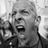

In [8]:
PIL.Image.open(emotion_dict["angry"][7])

In [9]:
X = []
y = []

for emotion_name, images in emotion_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img_resize = cv2.resize(img, (100, 100))
        X.append(img_resize)
        y.append(label[emotion_name])

In [10]:
len(X)

35887

In [11]:
len(y)

35887

In [12]:
y[:5]

[0, 0, 0, 0, 0]

In [13]:
X[:5]

[array([[[ 46,  46,  46],
         [ 43,  43,  43],
         [ 38,  38,  38],
         ...,
         [ 16,  16,  16],
         [ 20,  20,  20],
         [ 22,  22,  22]],
 
        [[ 47,  47,  47],
         [ 44,  44,  44],
         [ 37,  37,  37],
         ...,
         [ 15,  15,  15],
         [ 20,  20,  20],
         [ 22,  22,  22]],
 
        [[ 49,  49,  49],
         [ 44,  44,  44],
         [ 35,  35,  35],
         ...,
         [ 14,  14,  14],
         [ 19,  19,  19],
         [ 21,  21,  21]],
 
        ...,
 
        [[211, 211, 211],
         [208, 208, 208],
         [202, 202, 202],
         ...,
         [196, 196, 196],
         [198, 198, 198],
         [199, 199, 199]],
 
        [[209, 209, 209],
         [207, 207, 207],
         [203, 203, 203],
         ...,
         [187, 187, 187],
         [190, 190, 190],
         [192, 192, 192]],
 
        [[208, 208, 208],
         [206, 206, 206],
         [203, 203, 203],
         ...,
         [182, 182, 182],
  

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
X[0].shape

(100, 100, 3)

In [16]:
y[0]

0

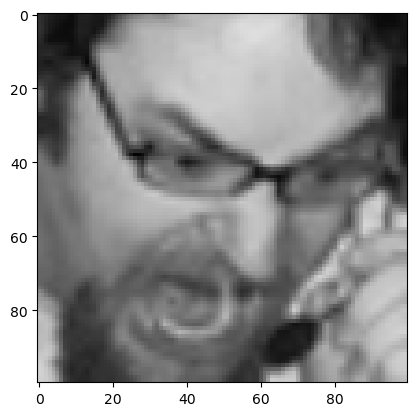

In [17]:
plt.axis()
plt.imshow(X[0])

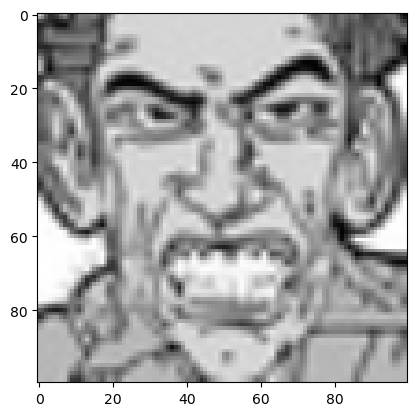

In [18]:
plt.axis()
plt.imshow(X[39])

In [19]:
y[39]

0

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [21]:
def image_with_tag(index):
    plt.axis("off")
    plt.imshow(X_train[index])
    keys_with_value = []
    for key, value in label.items():
        if value == y_train[index]:
            keys_with_value.append(key)

    print("Label is: {}".format(keys_with_value[0]))

Label is: surprise


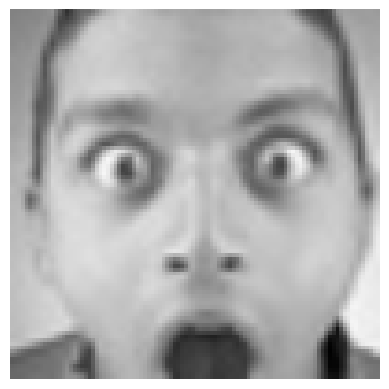

In [22]:
image_with_tag(50)

In [23]:
len(X_train)

28709

In [24]:
len(X_test)

7178

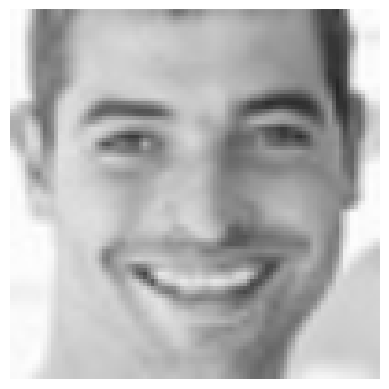

In [25]:
plt.axis("off")
plt.imshow(X_train[0])

In [26]:
X_train[0].shape

(100, 100, 3)

In [27]:
X.shape

(35887, 100, 100, 3)

In [28]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 225

In [29]:
# Data Augmentation

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.2),  
    layers.experimental.preprocessing.RandomBrightness(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2, 0.2)
])

In [63]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.4),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(7, activation="softmax") # 7 for 7 different classes
])

In [31]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [32]:
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


898/898 [==============================] - 116s 124ms/step - loss: 1.7842 - accuracy: 0.2622
Epoch 2/100
898/898 [==============================] - 106s 119ms/step - loss: 1.7080 - accuracy: 0.3104
Epoch 3/100
898/898 [==============================] - 106s 119ms/step - loss: 1.6321 - accuracy: 0.3611
Epoch 4/100
898/898 [==============================] - 106s 118ms/step - loss: 1.5569 - accuracy: 0.3948
Epoch 5/100
898/898 [==============================] - 107s 119ms/step - loss: 1.5007 - accuracy: 0.4167
Epoch 6/100
898/898 [==============================] - 106s 118ms/step - loss: 1.4640 - accuracy: 0.4346
Epoch 7/100
898/898 [==============================] - 106s 118ms/step - loss: 1.4299 - accuracy: 0.4475
Epoch 8/100
898/898 [==============================] - 106s 118ms/step - loss: 1.4074 - accuracy: 0.4552
Epoch 9/100
898/898 [==============================] - 106s 118ms/step - loss: 1.3839 - accuracy: 0.4676
Epoch 10/100
898/898 [==============================] - 106s 118ms/

In [33]:
model.evaluate(X_test_scaled, y_test)

225/225 [==============================] - 7s 26ms/step - loss: 1.1489 - accuracy: 0.5697


[1.1489344835281372, 0.5696572661399841]

In [36]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]

In [37]:
epochs = range(1, len(train_loss) + 1)

In [38]:
epochs

range(1, 101)

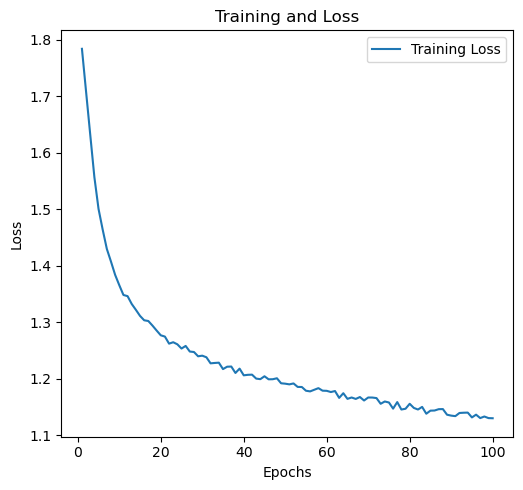

In [60]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Training Loss")
plt.title("Training and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

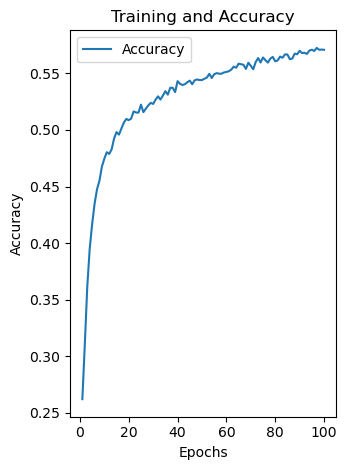

In [61]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label="Accuracy")
plt.title("Training and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
model.save("model.h5")

ValueError: Weights for model sequential_2 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.